# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [40]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [41]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

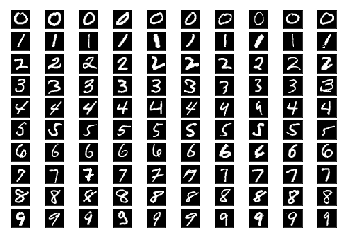

In [3]:
#def P1(num_examples=10):

### STUDENT START ###
    

def P1(num_examples=10):
    digits = [col for i in range(10) 
                  for col in [index for index, label in enumerate(mini_train_labels) if label==i][0:num_examples]]   
    fig, ax = plt.subplots(10, num_examples)
    plt.style.use("grayscale") # grayscale
    plt.setp(ax, xticks=[], yticks=[])
    for index, digit in enumerate(ax.flat):
        digit.imshow(np.reshape(mini_train_data[digits[index]], (28,28)))

### STUDENT END ###

#P1(10)

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
#def P2(k_values):

### STUDENT START ###

def P2(k_values):
    for k in k_values:
        print("\nk="+str(k))
        neightbour = KNeighborsClassifier(n_neighbors = k)
        neightbour.fit(mini_train_data, mini_train_labels)
        prediction = neightbour.predict(dev_data)
        matches = prediction == dev_labels  
        accuracy = np.mean(matches)
        print(accuracy)
        
        # Report accuracy for k = 1
        
        if k==1:
            print(classification_report(dev_labels,prediction))

### STUDENT END ###

#P2(k_values)

k_values = [1, 3, 5, 7, 9]

P2(k_values)


k=1
0.888
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000


k=3
0.878

k=5
0.869

k=7
0.865

k=9
0.863


ANSWER: Based on f1-score, 9 (9.0) is the most difficult digit since the f1-score is lowest. 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
#def P3(train_sizes, accuracies):

### STUDENT START ###
def P3(train_sizes, accuracies):
    for i in train_sizes:
        print("\ntrain_sizes="+str(i))
        start = time.time()
        neightbour = KNeighborsClassifier(n_neighbors = 1)
        neightbour.fit(train_data[:i],train_labels[:i])
        prediction = neightbour.predict(dev_data)
        matches = prediction == dev_labels  
        accuracy = np.mean(matches)
        end = time.time()
        print(accuracy)
        print("run time is " + str(end - start) + "\n")
        accuracies.append(accuracy)
    
    


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
#P3(train_sizes, accuracies)

P3(train_sizes, accuracies)
print(accuracies)


train_sizes=100
0.72
run time is 0.19711995124816895


train_sizes=200
0.786
run time is 0.23239684104919434


train_sizes=400
0.841
run time is 0.7964239120483398


train_sizes=800
0.884
run time is 1.024029016494751


train_sizes=1600
0.902
run time is 1.9452621936798096


train_sizes=3200
0.926
run time is 4.236318826675415


train_sizes=6400
0.937
run time is 8.259067058563232


train_sizes=12800
0.959
run time is 16.2703218460083


train_sizes=25000
0.97
run time is 33.47624325752258

[0.72, 0.786, 0.841, 0.884, 0.902, 0.926, 0.937, 0.959, 0.97]


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [10]:
#def P4():

### STUDENT START ###
def P4(train_sizes, accuracies, n):
    regr = LinearRegression()
    regr.fit(np.reshape(train_sizes,(-1,1)), accuracies)
    predicted = regr.predict(np.reshape(n,(-1,1)))
    print("\nStandard Regression predicted accuracy: " + str(predicted[0]))
    

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = [0.72, 0.786, 0.841, 0.884, 0.902, 0.926, 0.937, 0.959, 0.97]
n=60000

#P4()
P4(train_sizes, accuracies, n)

### Logit Transformation ###

def P4_transformed(train_sizes, accuracies, n):
    
    accLogit = [np.log(val/(1-val)) for val in accuracies]
    regr = LinearRegression()
    regr.fit(np.reshape(train_sizes,(-1,1)), accLogit)
    log = regr.predict(np.reshape(n,(1,-1)))
    logpredic = float(np.exp(log)/(np.exp(log) + 1))
    print("\nLogistic transformation predicted accuracy: " + str(logpredic))
   
P4_transformed(train_sizes, accuracies, n)


Standard Regression predicted accuracy: 1.24307226036

Logistic transformation predicted accuracy: 0.9988179603283155


ANSWER: Standard form is giving a predicted accuracy of 1.24, which is bigger than 1 and is wrong as any acurracy should be 1 at best. Simple regression will give such answer as the predicted value is not bounded. To correct for the nature that Y should be bounded between 0 and 1, a logit transformation would be useful

The new way of predicting will give an accuracy of 0.999. 
    
    

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98   2   0   0   0   1   0   0]
 [  0   0   0  83   0   1   0   0   1   1]
 [  0   0   0   0 102   0   0   0   0   2]
 [  1   0   0   0   0  88   0   0   1   1]
 [  1   0   0   0   1   0  96   0   0   0]
 [  0   0   1   0   0   0   0 111   0   1]
 [  1   0   1   2   0   2   1   0  89   0]
 [  0   0   0   0   0   0   0   0   0 106]] 

[[ 0.96  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.01  0.    0.98  0.02  0.    0.    0.    0.01  0.    0.  ]
 [ 0.    0.    0.    0.95  0.    0.01  0.    0.    0.01  0.01]
 [ 0.    0.    0.    0.    0.99  0.    0.    0.    0.    0.02]
 [ 0.01  0.    0.    0.    0.    0.97  0.    0.    0.01  0.01]
 [ 0.01  0.    0.    0.    0.01  0.    0.99  0.    0.    0.  ]
 [ 0.    0.    0.01  0.    0.    0.    0.    0.99  0.    0.01]
 [ 0.01  0.    0.01  0.02  0.    0.02  0.01  0.    0.98  0.  ]


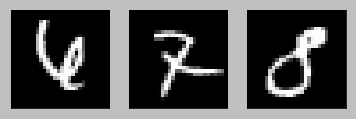

In [6]:
#def P5():

### STUDENT START ###

def P5():
    neightbour = KNeighborsClassifier(n_neighbors=1)
    neightbour.fit(train_data,train_labels)
    prediction = neightbour.predict(dev_data)
    print(confusion_matrix(dev_labels,prediction), "\n") 
    
    # normalize the confusion_matrix to see which pair is the most confused ones
    
    normalizer =[]
    for i in range(len(confusion_matrix(dev_labels,prediction))):
        num = 0
        for j in range(len(confusion_matrix(dev_labels,prediction))):
            num += confusion_matrix(dev_labels,prediction)[j][i] 
        normalizer.append(num)
    
    output = (confusion_matrix(dev_labels,prediction))/normalizer
    print(output.round(decimals = 2), "\n")
    
    # the highest % of mis-matched pair is 2%, there are a few of them, for eaxmple, 3 with 8
    
    matches = prediction == dev_labels
    SomeMistakes = [index for index, x in enumerate(matches) if x == False][0:3]
    
    # test 3 wrongly matched samples
    for i in range(3):
        print(str(dev_labels[SomeMistakes[i]]) + " is mis-predicted as " + str(prediction[SomeMistakes[i]]))
    
    # plot image
        
    fig, ax = plt.subplots(1, 3)
    plt.style.use("grayscale")
    plt.setp(ax, xticks=[], yticks=[])
    for index, digit in enumerate(ax.flat):
        digit.imshow(np.reshape(dev_data[SomeMistakes[index]], (28,28)))  
    
    
### STUDENT END ###

#P5()

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [7]:
#def P6():
    
### STUDENT START ###

def P6(data_to_transform):
    rs=[np.reshape(data, (28,28)) for data in data_to_transform]
    new = []

    for digit in range(len(rs)):
        blur = [[0 for x in range(28)] for y in range(28)] 
        for col in range(28):
            for row in range(28):
                
                # Corner Cases
                if col == 0 and row == 0:
                    blur[row][col] = (rs[digit][row][col] + rs[digit][row + 1][col + 1]
                                    + rs[digit][row + 1][col] + rs[digit][row][col + 1]) / 4
                    
                # Corner Cases
                elif col == 27 and row == 0:
                    blur[row][col] = (rs[digit][row][col] + rs[digit][row + 1][col - 1]
                                    + rs[digit][row + 1][col] + rs[digit][row][col - 1])/4
                
                # Corner Cases
                elif col == 0 and row == 27:
                    blur[row][col] = (rs[digit][row][col] + rs[digit][row - 1][col + 1]
                                    + rs[digit][row - 1][col] + rs[digit][row][col + 1]) / 4
                         
                # Corner Cases
                elif col == 27 and row == 27:
                    blur[row][col] = (rs[digit][row][col] + rs[digit][row-1][col-1]
                                    +rs[digit][row - 1][col]+rs[digit][row][col-1]) / 4
                    
                # On the Edge Cases
                elif col == 0:
                    blur[row][col] = (rs[digit][row][col] + rs[digit][row + 1][col + 1]
                                    + rs[digit][row - 1][col +1] + rs[digit][row + 1][col]
                                    + rs[digit][row - 1][col] + rs[digit][row][col + 1]) / 6
                # On the Edge Cases
                elif row == 0:
                    blur[row][col] = (rs[digit][row][col]+rs[digit][row + 1][col + 1]
                                    +rs[digit][row + 1][col - 1]+rs[digit][row + 1][col]
                                    + rs[digit][row][col + 1] + rs[digit][row][col - 1]) / 6
                # On the Edge Cases
                elif col == 27:
                    blur[row][col] = (rs[digit][row][col] + rs[digit][row - 1][col - 1]
                                    + rs[digit][row + 1][col - 1]+rs[digit][row + 1][col]
                                    + rs[digit][row - 1][col] + rs[digit][row][col - 1]) / 6
                # On the Edge Cases
                elif row == 27:
                    blur[row][col] = (rs[digit][row][col]+ rs[digit][row - 1][col - 1]
                                    + rs[digit][row-1][col + 1]+rs[digit][row - 1][col]
                                    + rs[digit][row][col + 1]+rs[digit][row][col - 1]) / 6
                # Normal Cases
                else:
                    blur[row][col] = (rs[digit][row][col] + rs[digit][row + 1][col + 1]+rs[digit][row - 1][col - 1]
                                    + rs[digit][row + 1][col - 1] + rs[digit][row - 1][col + 1] + rs[digit][row + 1][col]
                                    + rs[digit][row - 1][col] + rs[digit][row][col + 1] + rs[digit][row][col - 1]) / 9
        new.append(blur)
    return(new)

def Knn(k, train, train_label, dev, dev_label):
    neightbour = KNeighborsClassifier(n_neighbors=k)
    neightbour.fit(train,train_label)
    prediction = neightbour.predict(dev)
    matches = prediction == dev_label
    accuracy = np.mean(matches)
    return(accuracy)
    
    
# blurring train data and dev data
new_dev = P6(dev_data)
new_dev = np.reshape(new_dev,(len(dev_labels), -1))
new_train = P6(mini_train_data)
new_train = np.reshape(new_train,(len(mini_train_labels), -1))

# original
print("Original gives an accuracy :", Knn(2, mini_train_data, mini_train_labels, dev_data, dev_labels))

# preprocess the training data but not the dev data
print("Preprocess only the training data gives an accuracy :", Knn(2, new_train, 
                                                                     mini_train_labels, dev_data, dev_labels))

# preprocess the dev data but not the training data
print("Preprocess only the dev data gives an accuracy :",Knn(2, mini_train_data,
                                                               mini_train_labels, new_dev, dev_labels))

# preprocess both training and dev data
print("Preprocess both data gives an accuracy :",Knn(2, new_train, mini_train_labels, new_dev, dev_labels))

### STUDENT END ###



Original gives an accuracy : 0.864
Preprocess only the training data gives an accuracy : 0.892
Preprocess only the dev data gives an accuracy : 0.844
Preprocess both data gives an accuracy : 0.89


ANSWER: It seems that preprocess the training data but not the dev data gives a slightly higher accuray. But that difference is very marginal. Thus, the result might be different in another iteration. 

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [16]:
#def P7():

### STUDENT START ###

def P7():
    bernoulli = BernoulliNB(binarize=.1)
    bernoulli.fit(mini_train_data, mini_train_labels)
    prediction = bernoulli.predict(dev_data)
    matches = prediction == dev_labels
    accuracy = float(len([match for match in matches if match == True])) / float(len(matches))
    print("Bernoulli Accuracy: " + str(accuracy))

    multi_train_data = mini_train_data
    # for 
    for i in range(len(multi_train_data)):
        for j in range(len(multi_train_data[i])):
            if multi_train_data[i][j] >= 0.12:
                multi_train_data[i][j] = 2
            elif multi_train_data[i][j] >= 0.33:
                multi_train_data[i][j] = 1
            else:
                multi_train_data[i][j] = 0
    Multinomial = MultinomialNB()
    Multinomial.fit(multi_train_data, mini_train_labels)
    prediction = Multinomial.predict(dev_data)
    matches = prediction == dev_labels
    accuracy = np.mean(matches)
    print("Multinomial Accuracy: " + str(accuracy))
    
### STUDENT END ###

P7()

Bernoulli Accuracy: 0.811
Multinomial Accuracy: 0.796


ANSWER: The Bernoulli's accuracy is better than Multinomial accuracy. Having 3 classes doesn't make it better than only having 2 classes which is the difference here. The grey layer probably make it even difficult to classify the digits. 

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [22]:
#def P8(alphas):

### STUDENT START ###

def P8(alphas):
    bernoulli =BernoulliNB(binarize=.1)
    clf = GridSearchCV(bernoulli, alphas)
    dog = clf.fit(mini_train_data, mini_train_labels)
    pred = clf.predict(dev_data)
    print(dog.best_params_)
    matches = pred == dev_labels
    accuracy = np.mean(matches)
    print("The Alpha's Accuracy: " + str(accuracy))
    print("\n")
    return(clf.grid_scores_)


### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}
nb = P8(alphas)
print(nb)

/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:820: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


{'alpha': 0.001}
The Alpha's Accuracy: 0.814


[mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}, mean: 0.82400, std: 0.01626, params: {'alpha': 0.0001}, mean: 0.82500, std: 0.01531, params: {'alpha': 0.001}, mean: 0.82500, std: 0.01507, params: {'alpha': 0.01}, mean: 0.82000, std: 0.01903, params: {'alpha': 0.1}, mean: 0.81400, std: 0.01236, params: {'alpha': 0.5}, mean: 0.80700, std: 0.00717, params: {'alpha': 1.0}, mean: 0.79900, std: 0.01046, params: {'alpha': 2.0}, mean: 0.73900, std: 0.01789, params: {'alpha': 10.0}]


ANSWER: The accuracy is 0.814 for alpha = 0.001. When the alpha = 0.01, the mean accuracy is 0.092. This is extremely low. When alpha = 0, it means there is no laplace smoothing and without it, there will be feature values shown in our testing set which is not appeaered in the training sets. As a result, the conditional probability of seeing this value given a certain digit label is zero, so examples which would otherwise easily to be classified will have their likelihoods affected by these values.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [29]:
#def P9():

### STUDENT END ###

def P9():
    groups = {}
    for i in range(len(mini_train_data)-1):
        if mini_train_labels[i] in groups:
            groups[mini_train_labels[i]] = np.concatenate((groups[mini_train_labels[i]],[mini_train_data[i]]), axis=0)
        else:
            groups[mini_train_labels[i]] = [mini_train_data[i]]

    theta = np.array([[sum(i)/len(group) for i in zip(*group)] for key, group in groups.items()])
    sigma = np.array([[max(.1, np.var(i)) for i in zip(*group)] for key, group in groups.items()])
 
    Garussian = GaussianNB()
    Garussian.fit(mini_train_data, mini_train_labels)
    prediction = Garussian.predict(dev_data)
    matches = prediction == dev_labels
    accuracy = np.mean(matches)
    print("Gaussian Accuracy: " + str(accuracy))
    
    Garussian.sigma_=sigma
    Garussian.theta_=theta
    prediction = Garussian.predict(dev_data)
    matches = prediction == dev_labels
    accuracy = np.mean(matches)
    print("Gaussian Accuracy with estimated parameters added: " + str(accuracy))
    

### STUDENT END ###

gnb = P9()

Gaussian Accuracy: 0.551
Gaussian Accuracy with estimated parameters added: 0.036


ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

Bernoulli Accuracy: 0.811


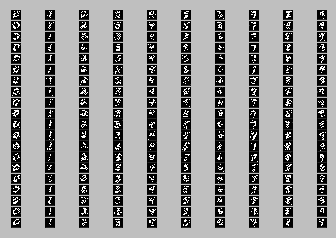

In [46]:
def P10(num_examples):

### STUDENT START ###

    bernoulli = BernoulliNB(binarize=.1)
    bernoulli.fit(mini_train_data, mini_train_labels)
    prediction = bernoulli.predict(dev_data)
    matches = prediction == dev_labels
    accuracy=np.mean(matches)
    print("Bernoulli Accuracy: " + str(accuracy))


#convert a log probability to a probability
    newSample = np.exp(bernoulli.feature_log_prob_)

    import random
    
#randomly picking numbers from a list with given probabilities
    def random_pick(some_list, probabilities):
        x = np.random.rand(1, 1)
        cumulative_probability = 0.0
        for item, item_probability in zip(some_list, probabilities):
            cumulative_probability += item_probability
            if x < cumulative_probability: break
        return item
    
# Generating 20 sample from each digit using the probability generated above

    newSample = [[random_pick([1,0],[prob, 1-prob]) for prob in digit] for i in range(20) for digit in newSample]

    fig, ax = plt.subplots(20, 10)
    plt.style.use("grayscale")
    plt.setp(ax, xticks=[], yticks=[])
    for index, digit in enumerate(ax.flat):
        digit.imshow(np.reshape(newSample[index], (28,28)))


### STUDENT END ###

P10(20)

ANSWER: These digits look more "random" than the training digits. This makes sense to me because now the digit is generated randomlly, given the probability of the training set over the region. Each digit has a random change of being black or white and thus for it's less recognizable than the original training data. 

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

Bernoulli Accuracy: 0.811 

p(pred) <= 0.5000000000000    total =   2    accuracy = 0.500
p(pred) <= 0.9000000000000    total =  39    accuracy = 0.359
p(pred) <= 0.9990000000000    total =  83    accuracy = 0.398
p(pred) <= 0.9999900000000    total =  62    accuracy = 0.500
p(pred) <= 0.9999999000000    total =  61    accuracy = 0.754
p(pred) <= 0.9999999990000    total =  77    accuracy = 0.727
p(pred) <= 0.9999999999900    total =  61    accuracy = 0.738
p(pred) <= 0.9999999999999    total =  58    accuracy = 0.862
p(pred) <= 1.0000000000000    total = 557    accuracy = 0.961


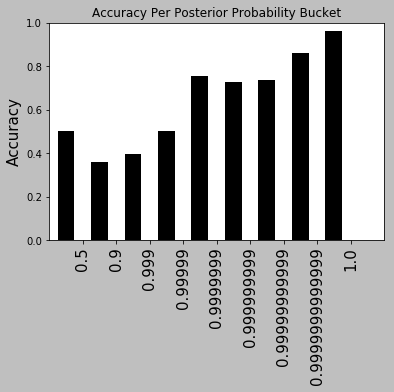

In [81]:
#def P11(buckets, correct, total):
    
### STUDENT START ###

def BucketIndex(prob, buckets):
    for i in range(len(buckets)):
        
        if i == 0:
            if prob < buckets[i]:
                return i
            
        elif i == len(buckets) - 1:
            if prob >= buckets[i]:
                return i
            
        else:
            if prob >= buckets[i-1] and prob < buckets[i]:
                return i
    return i

def P11(buckets, correct, total):

    bernoulli = BernoulliNB(binarize = .1)
    bernoulli.fit(mini_train_data, mini_train_labels)
    prediction = bernoulli.predict(dev_data)
    matches = prediction == dev_labels
    accuracy = np.mean(matches)
    print("Bernoulli Accuracy: " + str(accuracy), "\n")

    probSet = bernoulli.predict_proba(dev_data)
    predictions = bernoulli.predict(dev_data)

    for index, probs in enumerate(probSet):
        prob = np.amax(probs)
        bucketIndex = BucketIndex(prob,buckets)
        total[bucketIndex] += 1
        if predictions[index] == dev_labels[index]:
            correct[bucketIndex] += 1

    ratios = [float(x) / float(y) if x!=0 else 0 for x,y in zip(correct,total)]
    for i in range(len(buckets)):
        accuracy = 0.0
        if (total[i] > 0): accuracy = float(correct[i]) / float(total[i])
        print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))


    fig = plt.figure()
    ax = fig.add_subplot(111)
    N = len(ratios)

    ind = np.arange(N)                
    width = 0.5                 
    rects1 = ax.bar(ind, ratios, width,
                    color='black',
                    error_kw = dict(elinewidth = 0,ecolor='red'))
    
    ax.set_xlim(-width,len(ind)+width)
    ax.set_ylim(0, 1)
    ax.set_ylabel('Accuracy', fontsize = 15)
    ax.set_title('Accuracy Per Posterior Probability Bucket')
    xTickMarks = buckets
    ax.set_xticks(ind + width)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, rotation = 90, fontsize = 15)
    
    plt.show()

### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)


ANSWER: This classifier would be a weakly calibrated one. In the bar chart, we can see the accuracy is below .4 when the posterior probability is within the <0.9 bucket. Since there is a postive correlation between posterior probability and accuracy as accuracy reaches 100% when posterior probability goes to 1. Thus, the classifier is not a poorly calibrated one either. 



(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [47]:
#def P12():

### STUDENT START ###

# testing the accuracy changes for 1)Original Model 2)Adding Pixel Values 3)Adding no.of Rooms 4) Adding both 3) & 4)

# Count room methodology based on http://inventwithpython.com/blogstatic/floodfill/roomcounter.py

def floodFill(world, x, y, oldChar, newChar):
    
    # The recursive algorithm. Starting at x and y, changes any adjacent
    # characters that match oldChar to newChar.
    
    worldWidth = len(world)
    worldHeight = len(world[0])

    if oldChar == None:
        oldChar = world[x][y]

    if world[x][y] != oldChar:
        # Base case. If the current x, y character is not the oldChar,
        # then do nothing.
        return

    # Change the character at world[x][y] to newChar
    world[x][y] = newChar

    # Recursive calls. Make a recursive call as long as we are not on the
    # boundary (which would cause an Index Error.)
    if x > 0: # left
        floodFill(world, x-1, y, oldChar, newChar)

    if y > 0: # up
        floodFill(world, x, y-1, oldChar, newChar)

    if x < worldWidth-1: # right
        floodFill(world, x+1, y, oldChar, newChar)

    if y < worldHeight-1: # down
        floodFill(world, x, y+1, oldChar, newChar)
        
def getNumOfRooms(world):
    worldWidth = len(world)
    worldHeight = len(world[0])

    roomCount = -1 # because the outside area counts as room, so let's start
                   # off at -1.
    for x in range(worldWidth):
        for y in range(worldHeight):
            # on each possible x, y empty space in the map, call floodfill.
            if world[x][y] == 0:
                floodFill(world, x, y, 0, 1)
                roomCount += 1
    return roomCount

# Original data

def GetBernoulliAccuracy(train_data,train_labels,dev_data,dev_labels):
    bernnoulli = BernoulliNB(binarize=.1)
    bernnoulli.fit(train_data, train_labels)
    prediction = bernnoulli.predict(dev_data)
    matches = prediction == dev_labels
    accuracy = np.mean(matches)
    return(accuracy)

# pixel sum feature

def AddCountPixel(digit):
    DigitCopy = np.reshape(digit,(28,28))
    RowSum = DigitCopy.sum(axis=1)
    ColSum = DigitCopy.sum(axis=0)
    digit = np.append(digit,RowSum)
    digit = np.append(digit,ColSum)
    return(digit)

# Room Count Feature

def AddRoomCount(digit):
    import copy
    DigitCopy = np.reshape(digit,(28,28))
    regions = getNumOfRooms(copy.deepcopy(DigitCopy))
    digit = np.append(digit,regions)
    return(digit)

#Adding Both Feature
def AddBoth(digit):
    import copy
    DigitCopy = np.reshape(digit,(28,28))
    RowSum = DigitCopy.sum(axis=1)
    ColSum = DigitCopy.sum(axis=0)
    regions = getNumOfRooms(copy.deepcopy(DigitCopy))
    digit = np.append(digit,regions)
    digit = np.append(digit,RowSum)
    digit = np.append(digit,ColSum)
    return(digit)
    

# add new features to create training data
    
def P12():
    # Add Count Pixel Only
    MiniTrainAddPixelCountOnly = np.array([AddCountPixel(digit) for digit in mini_train_data])
    DevPlusAddPixelCountOnly = np.array([AddCountPixel(digit) for digit in dev_data])
    
    print("Original Accuracy:", str(GetBernoulliAccuracy(mini_train_data,mini_train_labels,dev_data,dev_labels)))
    print("Adding Pixel Count Accuray:", str(GetBernoulliAccuracy(MiniTrainAddPixelCountOnly,
                                                                  mini_train_labels,DevPlusAddPixelCountOnly,
                                                                  dev_labels)))
    print("Adding count pixel improves the accuracy by:",
          str(GetBernoulliAccuracy(MiniTrainAddPixelCountOnly,
                                   mini_train_labels,DevPlusAddPixelCountOnly,dev_labels) - 
              GetBernoulliAccuracy(mini_train_data,mini_train_labels,dev_data,dev_labels)))
    
    # Add Count Room Only
    MiniTrainAddRoomCountOnly = np.array([AddRoomCount(digit) for digit in mini_train_data])
    DevPlusAddRoomCountOnly = np.array([AddRoomCount(digit) for digit in dev_data])
    
    print("Original Accuracy:", str(GetBernoulliAccuracy(mini_train_data,mini_train_labels,dev_data,dev_labels)))
    print("Adding count room  Accuray:", str(GetBernoulliAccuracy(MiniTrainAddRoomCountOnly,
                                                                  mini_train_labels,DevPlusAddRoomCountOnly,
                                                                  dev_labels)))
    
    print("Adding count room improves the accuracy by:",
          str(GetBernoulliAccuracy(MiniTrainAddRoomCountOnly,
                                   mini_train_labels,DevPlusAddRoomCountOnly,dev_labels) - 
              GetBernoulliAccuracy(mini_train_data,mini_train_labels,dev_data,dev_labels)))
    
    # Add both features
    MiniTrainAddBoth = np.array([AddBoth(digit) for digit in mini_train_data])
    DevPlusBoth= np.array([AddBoth(digit) for digit in dev_data])
    
    print("Original Accuracy:", str(GetBernoulliAccuracy(mini_train_data,mini_train_labels,dev_data,dev_labels)))
    print("Adding Both Accuray:", str(GetBernoulliAccuracy(MiniTrainAddBoth,
                                                                  mini_train_labels,DevPlusBoth,
                                                                  dev_labels)))
    
    print("Adding both improves the accuracy by:",
          str(GetBernoulliAccuracy(MiniTrainAddBoth,
                                   mini_train_labels,DevPlusBoth,dev_labels) - 
              GetBernoulliAccuracy(mini_train_data,mini_train_labels,dev_data,dev_labels)))
    
    #check

### STUDENT END ###

P12()

Original Accuracy: 0.813
Adding Pixel Count Accuray: 0.823
Adding count pixel improves the accuracy by: 0.01
Original Accuracy: 0.813
Adding count room  Accuray: 0.823
Adding count room improves the accuracy by: 0.01
Original Accuracy: 0.813
Adding Both Accuray: 0.832
Adding both improves the accuracy by: 0.019


It seems that both features are able to improve the accuray by similar amount. 
And when they are used together, the increase in accuracy is increased by the aggregrated improve when used seperately